In [2]:
from sklearn import datasets

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [352]:
import math

In [40]:
import pandas as pd

# I. Linear Regression with One Variable

### Housing Price Portland Data

In [967]:
ftPath = "./data/ex3Data/ex3x.dat"
lbPath = "./data/ex3Data/ex3y.dat"

In [968]:
data = [] # Living area & number of bedroom
with open(ftPath) as f:
    for line in f:
        a = [float(i) for i in line.strip().split(' ')]
        data.append(a)

In [969]:
lbl = [] # Price
with open(lbPath) as f:
    for line in f:
        b = float(line.strip())
        lbl.append(b)

In [970]:
print(len(data), len(lbl))

47 47


### Test only with house area and price

In [971]:
# Draw image between X[0] and y
a = list(zip(*data))[0]
print(a)

(2104.0, 1600.0, 2400.0, 1416.0, 3000.0, 1985.0, 1534.0, 1427.0, 1380.0, 1494.0, 1940.0, 2000.0, 1890.0, 4478.0, 1268.0, 2300.0, 1320.0, 1236.0, 2609.0, 3031.0, 1767.0, 1888.0, 1604.0, 1962.0, 3890.0, 1100.0, 1458.0, 2526.0, 2200.0, 2637.0, 1839.0, 1000.0, 2040.0, 3137.0, 1811.0, 1437.0, 1239.0, 2132.0, 4215.0, 2162.0, 1664.0, 2238.0, 2567.0, 1200.0, 852.0, 1852.0, 1203.0)


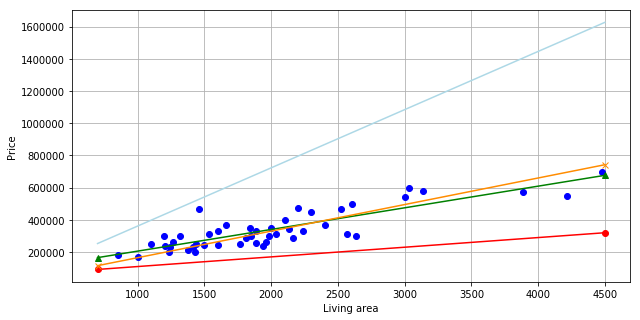

In [1256]:
plt.figure(figsize=(10, 5))
plt.plot(a, lbl, "bo")
# plt.axis([140, 190, 45, 75])
plt.xlabel("Living area")
plt.ylabel("Price")
xLine = np.array([700, 4500])
yLine = 50000 + 60*xLine
yOptima = 71270 + 134.5*xLine
yTest = 4 + 165*xLine
ySGD = -78.34792489 + 361.51173555*xLine
yMini = 165*xLine # similar to yTest
 
plt.plot(xLine, yLine, marker="o", color="r")
plt.plot(xLine, yOptima, marker="^", color="g")
plt.plot(xLine, yTest, marker="x", color="darkorange")
plt.plot(xLine, ySGD, color="lightblue")
plt.grid(True)
plt.show()

In [219]:
npA = np.c_[a].T
npy = np.c_[y]

m = len(a)
A = 1/(2*m) * (npA.T.dot(npA))[0][0]
B = -1/(2*m) * (npA.T.dot(npy))[0][0]
C = 1/(2*m) * (npy.T.dot(npy))[0][0]
print(A, B, C)

2310419.212765957 -382104564.09574467 65591548106.45744


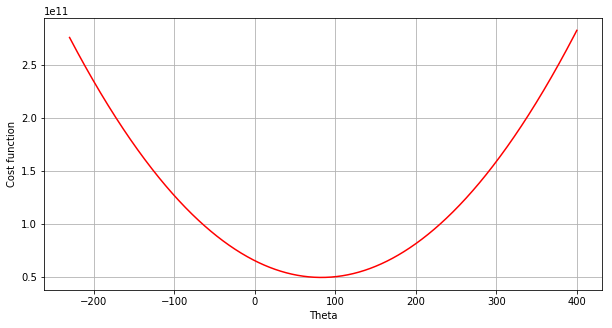

In [77]:
plt.figure(figsize=(10, 5))
theta = np.linspace(-230, 400, 1000)
J = A*theta**2 + B*theta + C
plt.plot(theta, J, color='r')
plt.xlabel("Theta")
plt.ylabel("Cost function")
plt.grid(True)
plt.show()

In [79]:
# Solve the problem for theta0, theta1
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(npA.reshape(-1, 1), y)
print(lin_reg.intercept_, lin_reg.coef_)

71270.49244872911 [134.52528772]


In [80]:
from mpl_toolkits.mplot3d import Axes3D

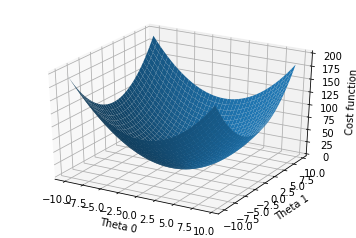

In [84]:
# Draw the 3D for 
def func(x, y):
    return x**2 + y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-10.0, 10.0, 0.5)
X, Y = np.meshgrid(x, y)
zs = np.array([func(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost function')

ax.plot_surface(X, Y, Z)

#### Data

In [973]:
m = len(data)
X = np.c_[np.ones((m, 1)), data]

In [974]:
X

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

In [977]:
y = np.c_[lbl]

In [978]:
y

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.],
       [299900.],
       [314900.],
       [198999.],
       [212000.],
       [242500.],
       [239999.],
       [347000.],
       [329999.],
       [699900.],
       [259900.],
       [449900.],
       [299900.],
       [199900.],
       [499998.],
       [599000.],
       [252900.],
       [255000.],
       [242900.],
       [259900.],
       [573900.],
       [249900.],
       [464500.],
       [469000.],
       [475000.],
       [299900.],
       [349900.],
       [169900.],
       [314900.],
       [579900.],
       [285900.],
       [249900.],
       [229900.],
       [345000.],
       [549000.],
       [287000.],
       [368500.],
       [329900.],
       [314000.],
       [299000.],
       [179900.],
       [299900.],
       [239500.]])

#### Batch Gradient Descent

#### With dummy init

In [975]:
len(X[0])

3

In [1245]:
c = len(X[0])
theta = np.random.randn(c,1)
print(theta)
eta = 2e-7

[[ 0.82537549]
 [ 0.71656381]
 [-0.73965849]]


In [1072]:
tmp1 = X.dot(theta) - y
gradients = (2/m) * X.T.dot(X.dot(theta) - y)
theta = theta - eta * gradients
err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
print("Error:", err) 
print(theta)

Error: 10101.297482260183
[[  0.93994615]
 [165.38227961]
 [  0.349971  ]]


In [1073]:
theta

array([[  0.93994615],
       [165.38227961],
       [  0.349971  ]])

In [1246]:
for i in range(1000):
    tmp1 = X.dot(theta) - y
    gradients = (2/m) * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
    err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
    print(i)
    # print(gradients)
    print(theta)
    print("MSE:", err)
    print("-"*10)

0
[[-6.77961127e+05]
 [-1.52180258e+09]
 [-2.23118115e+06]]
[[ 9.60967714e-01]
 [ 3.05077079e+02]
 [-2.93422256e-01]]
MSE: 44951.152176629585
----------
1
[[5.39898482e+05]
 [1.29100545e+09]
 [1.83144629e+06]]
[[ 0.85298802]
 [46.87598887]
 [-0.65971151]]
MSE: 38507.0486973293
----------
2
[[-4.93260009e+05]
 [-1.09521091e+09]
 [-1.61504131e+06]]
[[  0.95164002]
 [265.91817045]
 [ -0.33670325]]
MSE: 33101.953388040216
----------
3
[[3.83209232e+05]
 [9.29110857e+08]
 [1.30875053e+06]]
[[ 0.87499817]
 [80.09599899]
 [-0.59845336]]
MSE: 28586.441807831598
----------
4
[[-3.60334301e+05]
 [-7.88201404e+08]
 [-1.17161776e+06]]
[[  0.94706503]
 [237.73627972]
 [ -0.36412981]]
MSE: 24833.73562867088
----------
5
[[2.70443111e+05]
 [6.68662546e+08]
 [9.32576847e+05]]
[[  0.89297641]
 [104.00377058]
 [ -0.55064518]]
MSE: 21735.68499864995
----------
6
[[-2.64670320e+05]
 [-5.67252794e+08]
 [-8.52494679e+05]]
[[  0.94591047]
 [217.45432944]
 [ -0.38014624]]
MSE: 19199.181741968
----------
7
[[1

MSE: 10101.242639579204
----------
277
[[-19065.94784721]
 [    56.19144493]
 [-33189.3832988 ]]
[[  1.95677449]
 [165.38043612]
 [  1.34362138]]
MSE: 10101.242330991003
----------
278
[[-19065.94310233]
 [    56.19142066]
 [-33189.36818176]]
[[  1.96058768]
 [165.38042488]
 [  1.35025925]]
MSE: 10101.242022403043
----------
279
[[-19065.93835745]
 [    56.19139684]
 [-33189.35306472]]
[[  1.96440086]
 [165.38041364]
 [  1.35689713]]
MSE: 10101.241713815323
----------
280
[[-19065.93361257]
 [    56.19137313]
 [-33189.33794769]]
[[  1.96821405]
 [165.3804024 ]
 [  1.36353499]]
MSE: 10101.241405227842
----------
281
[[-19065.92886769]
 [    56.19134906]
 [-33189.32283067]]
[[  1.97202724]
 [165.38039117]
 [  1.37017286]]
MSE: 10101.241096640604
----------
282
[[-19065.92412282]
 [    56.19132526]
 [-33189.30771366]]
[[  1.97584042]
 [165.38037993]
 [  1.37681072]]
MSE: 10101.240788053603
----------
283
[[-19065.91937794]
 [    56.19130129]
 [-33189.29259665]]
[[  1.97965361]
 [165.38036

509
[[-19064.84708665]
 [    56.18590291]
 [-33185.87631794]]
[[  2.84140882]
 [165.37782896]
 [  2.88352705]]
MSE: 10101.170745016043
----------
510
[[-19064.84234222]
 [    56.18587889]
 [-33185.86120239]]
[[  2.84522179]
 [165.37781773]
 [  2.89016422]]
MSE: 10101.17043648377
----------
511
[[-19064.8375978 ]
 [    56.18585502]
 [-33185.84608685]]
[[  2.84903476]
 [165.37780649]
 [  2.89680139]]
MSE: 10101.170127951733
----------
512
[[-19064.83285337]
 [    56.18583116]
 [-33185.83097132]]
[[  2.85284772]
 [165.37779525]
 [  2.90343856]]
MSE: 10101.169819419936
----------
513
[[-19064.82810894]
 [    56.18580738]
 [-33185.81585579]]
[[  2.85666069]
 [165.37778402]
 [  2.91007572]]
MSE: 10101.169510888383
----------
514
[[-19064.82336452]
 [    56.18578326]
 [-33185.80074027]]
[[  2.86047365]
 [165.37777278]
 [  2.91671288]]
MSE: 10101.169202357067
----------
515
[[-19064.8186201 ]
 [    56.18575952]
 [-33185.78562476]]
[[  2.86428662]
 [165.37776154]
 [  2.92335004]]
MSE: 10101.168

751
[[-19063.69899137]
 [    56.18012262]
 [-33182.21854362]]
[[  3.76411952]
 [165.37510971]
 [  4.48963458]]
MSE: 10101.096087203623
----------
752
[[-19063.69424742]
 [    56.18009883]
 [-33182.20342964]]
[[  3.76793226]
 [165.37509847]
 [  4.49627102]]
MSE: 10101.095778729421
----------
753
[[-19063.68950346]
 [    56.18007501]
 [-33182.18831566]]
[[  3.771745  ]
 [165.37508724]
 [  4.50290746]]
MSE: 10101.095470255459
----------
754
[[-19063.68475951]
 [    56.18005087]
 [-33182.17320168]]
[[  3.77555773]
 [165.375076  ]
 [  4.50954389]]
MSE: 10101.095161781737
----------
755
[[-19063.68001555]
 [    56.18002732]
 [-33182.15808771]]
[[  3.77937047]
 [165.37506476]
 [  4.51618032]]
MSE: 10101.094853308257
----------
756
[[-19063.6752716 ]
 [    56.18000318]
 [-33182.14297375]]
[[  3.7831832 ]
 [165.37505353]
 [  4.52281675]]
MSE: 10101.094544835018
----------
757
[[-19063.67052765]
 [    56.17997973]
 [-33182.1278598 ]]
[[  3.78699594]
 [165.37504229]
 [  4.52945318]]
MSE: 10101.09

#### With choosen init

In [1232]:
theta = np.array([[90000], [120], [-8000]])
print(theta)
eta = 2e-7

[[90000]
 [  120]
 [-8000]]


In [1233]:
tmp1 = X.dot(theta) - y
gradients = (2/m) * X.T.dot(X.dot(theta) - y)
theta = theta - eta * gradients
err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
print(err)
print(theta)

10479.197643813908
[[90000.01427706]
 [  153.2157643 ]
 [-7999.95235913]]


In [1234]:
theta

array([[90000.01427706],
       [  153.2157643 ],
       [-7999.95235913]])

In [1235]:
for i in range(1000):
    tmp1 = X.dot(theta) - y
    gradients = (2/m) * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradients
    err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
    print(i)
    print(gradients)
    print(theta)
    print("MSE:", err)
    print("-"*10)

0
[[6.15232986e+04]
 [1.40891232e+08]
 [2.05162197e+05]]
[[90000.0019724 ]
 [  125.03751799]
 [-7999.99339157]]
MSE: 10168.983531482438
----------
1
[[-5.12283418e+04]
 [-1.19523612e+08]
 [-1.70963183e+05]]
[[90000.01221807]
 [  148.94224039]
 [-7999.95919893]]
MSE: 9939.739352728866
----------
2
[[4.44233363e+04]
 [1.01396605e+08]
 [1.48118860e+05]]
[[90000.00333341]
 [  128.66291938]
 [-7999.98882271]]
MSE: 9771.429367179642
----------
3
[[-3.67217678e+04]
 [-8.60187575e+07]
 [-1.22571065e+05]]
[[90000.01067776]
 [  145.86667087]
 [-7999.96430849]]
MSE: 9648.483357773624
----------
4
[[3.21168347e+04]
 [7.29731111e+07]
 [1.07065909e+05]]
[[90000.00425439]
 [  131.27204866]
 [-7999.98572168]]
MSE: 9559.023093669522
----------
5
[[-2.62816763e+04]
 [-6.19059827e+07]
 [-8.77442251e+04]]
[[90000.00951073]
 [  143.6532452 ]
 [-7999.96817283]]
MSE: 9494.118711941419
----------
6
[[2.32600912e+04]
 [5.25172900e+07]
 [7.75209192e+04]]
[[90000.00485871]
 [  133.1497872 ]
 [-7999.98367701]]
MS

 [-8000.06313951]]
MSE: 9325.417746804847
----------
266
[[ 521.65822492]
 [  -2.63551346]
 [1668.35065136]]
[[89999.9798183 ]
 [  137.97073729]
 [-8000.06347318]]
MSE: 9325.417746107707
----------
267
[[ 521.65800977]
 [  -2.63551255]
 [1668.34994048]]
[[89999.97971396]
 [  137.97073782]
 [-8000.06380685]]
MSE: 9325.417745410567
----------
268
[[ 521.65779463]
 [  -2.63551107]
 [1668.3492296 ]]
[[89999.97960963]
 [  137.97073835]
 [-8000.06414052]]
MSE: 9325.41774471343
----------
269
[[ 521.65757948]
 [  -2.63551047]
 [1668.34851871]]
[[89999.9795053 ]
 [  137.97073888]
 [-8000.06447419]]
MSE: 9325.417744016291
----------
270
[[ 521.65736434]
 [  -2.63550878]
 [1668.34780783]]
[[89999.97940097]
 [  137.9707394 ]
 [-8000.06480786]]
MSE: 9325.417743319153
----------
271
[[ 521.65714919]
 [  -2.63550818]
 [1668.34709695]]
[[89999.97929664]
 [  137.97073993]
 [-8000.06514153]]
MSE: 9325.417742622016
----------
272
[[ 521.65693405]
 [  -2.63550664]
 [1668.34638607]]
[[89999.97919231]
 [  

MSE: 9325.417613661843
----------
457
[[ 521.61713382]
 [  -2.63529955]
 [1668.21487811]]
[[89999.95989174]
 [  137.97083797]
 [-8000.12720157]]
MSE: 9325.417612964817
----------
458
[[ 521.61691869]
 [  -2.63529853]
 [1668.21416728]]
[[89999.95978742]
 [  137.97083849]
 [-8000.12753521]]
MSE: 9325.417612267789
----------
459
[[ 521.61670356]
 [  -2.63529734]
 [1668.21345646]]
[[89999.95968309]
 [  137.97083902]
 [-8000.12786886]]
MSE: 9325.417611570767
----------
460
[[ 521.61648843]
 [  -2.63529642]
 [1668.21274563]]
[[89999.95957877]
 [  137.97083955]
 [-8000.1282025 ]]
MSE: 9325.41761087374
----------
461
[[ 521.61627331]
 [  -2.63529501]
 [1668.21203481]]
[[89999.95947445]
 [  137.97084008]
 [-8000.12853614]]
MSE: 9325.417610176712
----------
462
[[ 521.61605818]
 [  -2.63529404]
 [1668.21132398]]
[[89999.95937012]
 [  137.9708406 ]
 [-8000.12886978]]
MSE: 9325.417609479691
----------
463
[[ 521.61584305]
 [  -2.63529305]
 [1668.21061316]]
[[89999.9592658 ]
 [  137.97084113]
 [-80

MSE: 9325.417439423542
----------
707
[[ 521.56335469]
 [  -2.63501953]
 [1668.03718108]]
[[89999.93381223]
 [  137.97096972]
 [-8000.21060785]]
MSE: 9325.417438726663
----------
708
[[ 521.56313958]
 [  -2.63501862]
 [1668.03647033]]
[[89999.93370792]
 [  137.97097025]
 [-8000.21094146]]
MSE: 9325.417438029785
----------
709
[[ 521.56292448]
 [  -2.63501735]
 [1668.03575958]]
[[89999.93360361]
 [  137.97097078]
 [-8000.21127507]]
MSE: 9325.417437332906
----------
710
[[ 521.56270937]
 [  -2.63501653]
 [1668.03504883]]
[[89999.9334993 ]
 [  137.97097131]
 [-8000.21160868]]
MSE: 9325.41743663603
----------
711
[[ 521.56249427]
 [  -2.63501517]
 [1668.03433808]]
[[89999.93339498]
 [  137.97097183]
 [-8000.21194228]]
MSE: 9325.417435939153
----------
712
[[ 521.56227916]
 [  -2.635014  ]
 [1668.03362733]]
[[89999.93329067]
 [  137.97097236]
 [-8000.21227589]]
MSE: 9325.417435242278
----------
713
[[ 521.56206406]
 [  -2.63501297]
 [1668.03291658]]
[[89999.93318636]
 [  137.97097289]
 [-80

MSE: 9325.417265222248
----------
957
[[ 521.50958126]
 [  -2.63474004]
 [1667.85950292]]
[[89999.90773542]
 [  137.97110147]
 [-8000.29400525]]
MSE: 9325.417264525517
----------
958
[[ 521.50936618]
 [  -2.63473841]
 [1667.85879225]]
[[89999.90763111]
 [  137.971102  ]
 [-8000.29433883]]
MSE: 9325.417263828787
----------
959
[[ 521.50915109]
 [  -2.63473778]
 [1667.85808157]]
[[89999.90752681]
 [  137.97110252]
 [-8000.2946724 ]]
MSE: 9325.417263132058
----------
960
[[ 521.50893601]
 [  -2.63473619]
 [1667.8573709 ]]
[[89999.90742251]
 [  137.97110305]
 [-8000.29500597]]
MSE: 9325.417262435329
----------
961
[[ 521.50872093]
 [  -2.63473544]
 [1667.85666023]]
[[89999.90731821]
 [  137.97110358]
 [-8000.29533954]]
MSE: 9325.4172617386
----------
962
[[ 521.50850585]
 [  -2.63473423]
 [1667.85594955]]
[[89999.90721391]
 [  137.9711041 ]
 [-8000.29567311]]
MSE: 9325.417261041874
----------
963
[[ 521.50829077]
 [  -2.6347329 ]
 [1667.85523888]]
[[89999.90710961]
 [  137.97110463]
 [-800

#### With scale data

In [1162]:
from sklearn.preprocessing import MinMaxScaler

In [1238]:
scaler = MinMaxScaler()
scaler.fit(X)
scaleX = scaler.transform(X)

In [1236]:
c = len(X[0])
theta = np.random.randn(c,1)
print(theta)
eta = 0.5

[[ 0.03807165]
 [ 0.33369691]
 [-0.44198234]]


In [1237]:
for i in range(1000):
    tmp1 = scaleX.dot(theta) - y
    gradients = (2/m) * scaleX.T.dot(scaleX.dot(theta) - y)
    theta = theta - eta * gradients
    err = 1/m * math.sqrt((scaleX.dot(theta)-y).T.dot(scaleX.dot(theta)-y))
    print(i)
    print(gradients)
    print(theta)
    print("MSE:", err)
    print("-"*10)

0
[[      0.        ]
 [-261543.11968848]
 [-389977.68283733]]
[[3.80716493e-02]
 [1.30771894e+05]
 [1.94988399e+05]]
MSE: 31260.425071597812
----------
1
[[      0.        ]
 [-147060.76218699]
 [-210438.53711255]]
[[3.80716493e-02]
 [2.04302275e+05]
 [3.00207668e+05]]
MSE: 20851.27680806423
----------
2
[[      0.        ]
 [ -84410.59719916]
 [-112401.90574991]]
[[3.80716493e-02]
 [2.46507573e+05]
 [3.56408621e+05]]
MSE: 16491.59766939267
----------
3
[[     0.        ]
 [-50083.46122999]
 [-58896.17711825]]
[[3.80716493e-02]
 [2.71549304e+05]
 [3.85856709e+05]]
MSE: 14918.04667646753
----------
4
[[     0.        ]
 [-31234.06784353]
 [-29720.37196346]]
[[3.80716493e-02]
 [2.87166338e+05]
 [4.00716895e+05]]
MSE: 14387.846769752365
----------
5
[[     0.        ]
 [-20843.79503431]
 [-13836.85908132]]
[[3.80716493e-02]
 [2.97588235e+05]
 [4.07635325e+05]]
MSE: 14199.48131617571
----------
6
[[     0.        ]
 [-15077.66817554]
 [ -5214.79173082]]
[[3.80716493e-02]
 [3.05127069e+05]

 [3.06410954e+05]]
MSE: 13324.573886621305
----------
265
[[  0.        ]
 [-17.48064049]
 [ 11.11534282]]
[[3.80716493e-02]
 [4.82447946e+05]
 [3.06405396e+05]]
MSE: 13324.573717332796
----------
266
[[  0.        ]
 [-17.0690018 ]
 [ 10.85359582]]
[[3.80716493e-02]
 [4.82456480e+05]
 [3.06399970e+05]]
MSE: 13324.573555923309
----------
267
[[  0.        ]
 [-16.66705648]
 [ 10.59801251]]
[[3.80716493e-02]
 [4.82464814e+05]
 [3.06394671e+05]]
MSE: 13324.573402026143
----------
268
[[  0.        ]
 [-16.27457627]
 [ 10.34844773]]
[[3.80716493e-02]
 [4.82472951e+05]
 [3.06389496e+05]]
MSE: 13324.57325529166
----------
269
[[  0.        ]
 [-15.89133829]
 [ 10.10475978]]
[[3.80716493e-02]
 [4.82480897e+05]
 [3.06384444e+05]]
MSE: 13324.573115386489
----------
270
[[  0.        ]
 [-15.5171249 ]
 [  9.86681025]]
[[3.80716493e-02]
 [4.82488655e+05]
 [3.06379511e+05]]
MSE: 13324.572981992786
----------
271
[[  0.        ]
 [-15.15172358]
 [  9.63446402]]
[[3.80716493e-02]
 [4.82496231e+05]


[[ 0.        ]
 [-0.19344402]
 [ 0.12300445]]
[[3.80716493e-02]
 [4.82806361e+05]
 [3.06177492e+05]]
MSE: 13324.570249717957
----------
455
[[ 0.        ]
 [-0.18888875]
 [ 0.12010791]]
[[3.80716493e-02]
 [4.82806456e+05]
 [3.06177432e+05]]
MSE: 13324.570249698192
----------
456
[[ 0.        ]
 [-0.18444075]
 [ 0.11727958]]
[[3.80716493e-02]
 [4.82806548e+05]
 [3.06177374e+05]]
MSE: 13324.570249679344
----------
457
[[ 0.        ]
 [-0.18009749]
 [ 0.11451785]]
[[3.80716493e-02]
 [4.82806638e+05]
 [3.06177316e+05]]
MSE: 13324.570249661374
----------
458
[[ 0.        ]
 [-0.17585651]
 [ 0.11182115]]
[[3.80716493e-02]
 [4.82806726e+05]
 [3.06177260e+05]]
MSE: 13324.57024964424
----------
459
[[ 0.        ]
 [-0.17171539]
 [ 0.10918796]]
[[3.80716493e-02]
 [4.82806812e+05]
 [3.06177206e+05]]
MSE: 13324.570249627908
----------
460
[[ 0.        ]
 [-0.1676718 ]
 [ 0.10661677]]
[[3.80716493e-02]
 [4.82806896e+05]
 [3.06177153e+05]]
MSE: 13324.570249612332
----------
461
[[ 0.        ]
 [-0.1

704
[[ 0.        ]
 [-0.00050032]
 [ 0.00031814]]
[[3.80716493e-02]
 [4.82810361e+05]
 [3.06174949e+05]]
MSE: 13324.570249293265
----------
705
[[ 0.        ]
 [-0.00048854]
 [ 0.00031065]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.570249293261
----------
706
[[ 0.        ]
 [-0.00047704]
 [ 0.00030333]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.570249293261
----------
707
[[ 0.        ]
 [-0.0004658 ]
 [ 0.00029619]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.570249293261
----------
708
[[ 0.        ]
 [-0.00045484]
 [ 0.00028921]]
[[3.80716493e-02]
 [4.82810362e+05]
 [3.06174948e+05]]
MSE: 13324.57024929326
----------
709
[[ 0.        ]
 [-0.00044412]
 [ 0.0002824 ]]
[[3.80716493e-02]
 [4.82810363e+05]
 [3.06174948e+05]]
MSE: 13324.57024929326
----------
710
[[ 0.        ]
 [-0.00043367]
 [ 0.00027575]]
[[3.80716493e-02]
 [4.82810363e+05]
 [3.06174948e+05]]
MSE: 13324.57024929326
----------
711
[[ 0.        ]
 [-0

954
[[ 0.00000000e+00]
 [-1.29402765e-06]
 [ 8.22852599e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
955
[[ 0.00000000e+00]
 [-1.26355463e-06]
 [ 8.03478736e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
956
[[ 0.00000000e+00]
 [-1.23379620e-06]
 [ 7.84554125e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.570249293256
----------
957
[[ 0.00000000e+00]
 [-1.20476285e-06]
 [ 7.66053842e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
958
[[ 0.0000000e+00]
 [-1.1763687e-06]
 [ 7.4804693e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
959
[[ 0.00000000e+00]
 [-1.14867656e-06]
 [ 7.30419917e-07]]
[[3.80716493e-02]
 [4.82810372e+05]
 [3.06174942e+05]]
MSE: 13324.57024929326
----------
960
[[ 0.00000000e+00]
 [-1.12163972e-06]
 [ 7.13207787e-07]]
[[3.80716493e-02]
 [4.82810372e+05

In [1244]:
Z = np.array([[3.80716493e-02], [4.82810372e+05], [3.06174942e+05]]).reshape(1, 3)
scaleZ = scaler.transform(Z)
print(scaleZ)

[[-9.61928351e-01  1.32917367e+02  7.65434855e+04]]


### Using sklearn built-in function

In [1225]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(data, lbl)
print(lin_reg.intercept_, lin_reg.coef_)

89597.90954279748 [  139.21067402 -8738.01911233]


In [1227]:
lin_reg.score(data, lbl)

0.7329450180289141

In [388]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [1231]:
theta_best = np.array([[89597.9], [139.21067402], [-8738.01911233]])
error = 1/m * math.sqrt((X.dot(theta_best)-y).T.dot(X.dot(theta_best)-y))
print(error)

9324.595822859925


### Stochastic Gradient Descent

In [1267]:
n_epochs = 60
t0, t1 = 2, 10000000 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)
c = len(X[0])
theta = np.random.randn(c,1) # random initialization
print(theta)
# minErr = 1e6
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        # Should or shouldn't?
        theta = theta - eta * gradients
        err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
        
        print(epoch*m + i)
        print("Eta:", eta)
        print(theta)
        print("Error:", err)
        
        

[[-0.15072682]
 [-1.29361178]
 [-1.80913751]]
0
Eta: 2e-07
[[-2.98055576e-02]
 [ 2.22652566e+02]
 [-1.32545246e+00]]
Error: 20602.665328256826
1
Eta: 1.99999980000002e-07
[[-5.99233809e-02]
 [ 1.85426937e+02]
 [-1.41580593e+00]]
Error: 11896.558522821513
2
Eta: 1.99999960000008e-07
[[-5.60169687e-02]
 [ 1.93646028e+02]
 [-1.40408670e+00]]
Error: 13437.250671737225
3
Eta: 1.99999940000018e-07
[[  -0.12291288]
 [-105.91387804]
 [  -1.73856627]]
Error: 85664.57330174695
4
Eta: 1.99999920000032e-07
[[ 4.75278453e-02]
 [ 9.86149964e+01]
 [-1.22724408e+00]]
Error: 23245.465711193596
5
Eta: 1.9999990000005e-07
[[ 1.01430894e-01]
 [ 2.13536296e+02]
 [-1.01163189e+00]]
Error: 18165.643303634562
6
Eta: 1.99999880000072e-07
[[ 4.21690874e-02]
 [ 1.01650005e+02]
 [-1.13015550e+00]]
Error: 22392.15567516737
7
Eta: 1.99999860000098e-07
[[ 8.68285235e-02]
 [ 1.84359281e+02]
 [-9.51517758e-01]]
Error: 11723.271255525604
8
Eta: 1.99999840000128e-07
[[ 6.98633210e-02]
 [ 1.60947302e+02]
 [-1.00241337e+0

[[  0.79273634]
 [225.69572244]
 [  1.27275224]]
Error: 21440.488451000336
245
Eta: 1.9999510012004707e-07
[[ 0.73786046]
 [61.06809454]
 [ 1.05324874]]
Error: 34232.071273570014
246
Eta: 1.9999508012102903e-07
[[  0.88804029]
 [280.03029222]
 [  1.50378824]]
Error: 37340.996275393656
247
Eta: 1.9999506012201498e-07
[[  0.84996771]
 [231.75425624]
 [  1.38957049]]
Error: 23133.492962524746
248
Eta: 1.9999504012300496e-07
[[ 0.78782158]
 [45.31586756]
 [ 1.14098597]]
Error: 38978.51490914731
249
Eta: 1.999950201239989e-07
[[  0.86181206]
 [134.32641242]
 [  1.3629574 ]]
Error: 14030.295977581161
250
Eta: 1.9999500012499688e-07
[[  0.85493537]
 [105.34118565]
 [  1.33545066]]
Error: 21364.480643983155
251
Eta: 1.9999498012599884e-07
[[  0.9262365 ]
 [255.35875051]
 [  1.54935404]]
Error: 29966.75458451781
252
Eta: 1.999949601270048e-07
[[  0.85955777]
 [148.40607763]
 [  1.34931787]]
Error: 11417.73480193704
253
Eta: 1.9999494012801477e-07
[[  0.86957579]
 [166.95945346]
 [  1.38938995]]

Eta: 1.999905204493307e-07
[[ 10.58800195]
 [224.54315566]
 [ 12.63966239]]
Error: 21127.809885509654
475
Eta: 1.9999050045122858e-07
[[ 10.58593177]
 [221.09838778]
 [ 12.63552205]]
Error: 20185.725243025132
476
Eta: 1.9999048045313044e-07
[[ 10.55011627]
 [130.62842671]
 [ 12.52807554]]
Error: 14853.417111549457
477
Eta: 1.999904604550363e-07
[[ 10.60699266]
 [198.88009284]
 [ 12.6987047 ]]
Error: 14576.999031004112
478
Eta: 1.9999044045694615e-07
[[ 10.61115972]
 [202.43043087]
 [ 12.70703883]]
Error: 15398.983761113677
479
Eta: 1.9999042045886003e-07
[[ 10.56027229]
 [106.35495552]
 [ 12.60526396]]
Error: 21079.000737128714
480
Eta: 1.9999040046077788e-07
[[ 10.59369361]
 [156.28641347]
 [ 12.70552793]]
Error: 10493.731624133627
481
Eta: 1.9999038046269975e-07
[[ 10.62373534]
 [202.37042357]
 [ 12.79565312]]
Error: 15384.815749726902
482
Eta: 1.9999036046462562e-07
[[ 10.62615855]
 [206.24755611]
 [ 12.80292274]]
Error: 16321.333490013036
483
Eta: 1.9999034046655546e-07
[[ 10.60221

768
Eta: 1.999846411795574e-07
[[ 10.65046283]
 [287.20798159]
 [ 13.41394392]]
Error: 39518.704238348335
769
Eta: 1.9998462118263105e-07
[[ 10.57581272]
 [175.68072304]
 [ 13.1899936 ]]
Error: 10606.432077435997
770
Eta: 1.999846011857087e-07
[[ 10.54187577]
 [109.09642202]
 [ 13.05424579]]
Error: 20328.51142729872
771
Eta: 1.9998458118879035e-07
[[ 10.60398939]
 [208.47821258]
 [ 13.24058665]]
Error: 16876.43433280717
772
Eta: 1.99984561191876e-07
[[10.53818955]
 [80.82652347]
 [12.97738729]]
Error: 28365.066992418895
773
Eta: 1.9998454119496563e-07
[[ 10.57287126]
 [172.28220331]
 [ 13.08143243]]
Error: 10331.246117157365
774
Eta: 1.9998452119805926e-07
[[ 10.56240568]
 [153.32904249]
 [ 13.03957012]]
Error: 10782.091980369843
775
Eta: 1.9998450120115692e-07
[[ 10.59434327]
 [249.14179922]
 [ 13.16732046]]
Error: 28145.0871906903
776
Eta: 1.9998448120425855e-07
[[ 10.56508072]
 [184.76418689]
 [ 13.07953281]]
Error: 11791.621627446224
777
Eta: 1.9998446120736418e-07
[[ 10.50713222]


Eta: 1.9997886223426183e-07
[[ 11.16304856]
 [120.71625852]
 [ 15.62047369]]
Error: 17260.76753027729
1058
Eta: 1.9997884223849116e-07
[[ 11.18270926]
 [140.3769616 ]
 [ 15.64013439]]
Error: 12781.413704062998
1059
Eta: 1.999788222427245e-07
[[ 11.21093364]
 [174.33088577]
 [ 15.72480752]]
Error: 10485.275282362207
1060
Eta: 1.9997880224696182e-07
[[ 11.23914224]
 [259.8311521 ]
 [ 15.83764192]]
Error: 31297.812144436586
1061
Eta: 1.9997878225120316e-07
[[ 11.16957845]
 [148.25083728]
 [ 15.62895056]]
Error: 11436.192209712024
1062
Eta: 1.9997876225544846e-07
[[ 11.16593193]
 [141.80742389]
 [ 15.61801098]]
Error: 12511.595668758491
1063
Eta: 1.999787422596978e-07
[[ 11.21743568]
 [203.61192833]
 [ 15.77252224]]
Error: 15681.547606869151
1064
Eta: 1.9997872226395113e-07
[[ 11.1817695 ]
 [127.57163127]
 [ 15.62985751]]
Error: 15568.59218535992
1065
Eta: 1.9997870226820843e-07
[[ 11.20359924]
 [172.10430808]
 [ 15.71717649]]
Error: 10319.830850692437
1066
Eta: 1.9997868227246975e-07
[[ 1

 [ 18.53842065]]
Error: 23487.68560411666
1352
Eta: 1.999729636553138e-07
[[ 11.3311392 ]
 [-98.74620314]
 [ 18.16103073]]
Error: 83422.62401044666
1353
Eta: 1.999729436607227e-07
[[  11.78787075]
 [1946.49767224]
 [  20.44468847]]
Error: 558576.612231665
1354
Eta: 1.9997292366613561e-07
[[ 10.72175884]
 [353.72648445]
 [ 17.24635275]]
Error: 59922.335906317
1355
Eta: 1.999729036715525e-07
[[  10.53249461]
 [-219.93338853]
 [  16.48929584]]
Error: 121229.92742501317
1356
Eta: 1.9997288367697341e-07
[[ 10.83742106]
 [439.31759745]
 [ 17.70900164]]
Error: 86494.31091669283
1357
Eta: 1.999728636823983e-07
[[ 10.60077046]
 [-65.22148813]
 [ 16.76239923]]
Error: 72999.99936391012
1358
Eta: 1.999728436878272e-07
[[ 10.84067059]
 [486.548812  ]
 [ 17.72199975]]
Error: 101217.27549095624
1359
Eta: 1.9997282369326008e-07
[[ 10.71401685]
 [359.89507438]
 [ 17.59534602]]
Error: 61829.85505545427
1360
Eta: 1.9997280369869698e-07
[[  10.5161191 ]
 [-115.05954321]
 [  17.00165274]]
Error: 88502.9011

1590
Eta: 1.999682050553962e-07
[[ 12.05262366]
 [276.02070161]
 [ 22.75990406]]
Error: 36142.678184455326
1591
Eta: 1.9996818506175669e-07
[[ 11.98026402]
 [123.77601276]
 [ 22.54282513]]
Error: 16489.620314112144
1592
Eta: 1.9996816506812117e-07
[[ 11.99113507]
 [169.59749352]
 [ 22.58630934]]
Error: 10187.914985848087
1593
Eta: 1.9996814507448964e-07
[[ 11.97639608]
 [140.34058551]
 [ 22.52735335]]
Error: 12786.224760360017
1594
Eta: 1.9996812508086212e-07
[[ 12.02988648]
 [279.89705025]
 [ 22.74131497]]
Error: 37311.230579299154
1595
Eta: 1.999681050872386e-07
[[ 11.94475032]
 [109.62472522]
 [ 22.48590648]]
Error: 20180.881311111432
1596
Eta: 1.9996808509361906e-07
[[ 11.98166037]
 [162.66447585]
 [ 22.59663665]]
Error: 10135.21881483406
1597
Eta: 1.9996806510000352e-07
[[ 11.97814584]
 [156.29965782]
 [ 22.58257852]]
Error: 10490.986591277548
1598
Eta: 1.99968045106392e-07
[[ 12.07274487]
 [294.22504689]
 [ 22.86637562]]
Error: 41653.897955548506
1599
Eta: 1.9996802511278447e-07


1857
Eta: 1.9996286689561748e-07
[[   9.58793763]
 [-115.26821245]
 [  20.09505975]]
Error: 88566.62607272135
1858
Eta: 1.999628469030454e-07
[[ 9.72483285]
 [53.93427929]
 [20.50574541]]
Error: 36365.41613645999
1859
Eta: 1.9996282691047734e-07
[[  9.81765302]
 [196.32042641]
 [ 20.78420593]]
Error: 14011.631354074487
1860
Eta: 1.9996280691791326e-07
[[  9.81895453]
 [197.88613166]
 [ 20.78811044]]
Error: 14356.251444760232
1861
Eta: 1.9996278692535318e-07
[[  9.80774992]
 [186.68152135]
 [ 20.77690583]]
Error: 12114.434432083639
1862
Eta: 1.9996276693279712e-07
[[  9.7769403 ]
 [132.24092647]
 [ 20.68447697]]
Error: 14484.033236142412
1863
Eta: 1.9996274694024504e-07
[[  9.79481525]
 [157.55185678]
 [ 20.72022687]]
Error: 10392.086795762141
1864
Eta: 1.9996272694769695e-07
[[  9.79802316]
 [163.49291768]
 [ 20.73305854]]
Error: 10117.160980444403
1865
Eta: 1.9996270695515286e-07
[[  9.82601226]
 [194.28092479]
 [ 20.81702583]]
Error: 13576.248836414985
1866
Eta: 1.9996268696261276e-0

Eta: 1.9995720915724035e-07
[[ 10.89573115]
 [182.43638119]
 [ 24.23907208]]
Error: 11434.155493444187
2141
Eta: 1.999571891657996e-07
[[ 10.91538149]
 [204.05175515]
 [ 24.2980231 ]]
Error: 15790.0389436652
2142
Eta: 1.9995716917436284e-07
[[ 10.89677806]
 [157.05948509]
 [ 24.2422128 ]]
Error: 10428.911599159332
2143
Eta: 1.9995714918293009e-07
[[ 10.8998852 ]
 [161.701547  ]
 [ 24.25153421]]
Error: 10164.61151637583
2144
Eta: 1.9995712919150135e-07
[[ 10.93108281]
 [243.0961229 ]
 [ 24.37632467]]
Error: 26389.07584989921
2145
Eta: 1.999571092000766e-07
[[ 10.90785039]
 [207.45758804]
 [ 24.3066274 ]]
Error: 16624.938530229345
2146
Eta: 1.9995708920865582e-07
[[ 10.86889566]
 [124.40611404]
 [ 24.1508085 ]]
Error: 16333.424203358336
2147
Eta: 1.9995706921723905e-07
[[ 10.93551104]
 [324.25222999]
 [ 24.41726999]]
Error: 50839.85487154963
2148
Eta: 1.999570492258263e-07
[[ 10.93217418]
 [319.38709   ]
 [ 24.40725941]]
Error: 49345.7074109099
2149
Eta: 1.9995702923441753e-07
[[ 10.8669

Eta: 1.9995221142147027e-07
[[ 11.56887027]
 [220.95609348]
 [ 22.48751379]]
Error: 20150.902017152333
2391
Eta: 1.9995219143102883e-07
[[  11.45303181]
 [-297.76853145]
 [  21.90832149]]
Error: 145562.15789612688
2392
Eta: 1.9995217144059141e-07
[[  11.62640775]
 [-150.05223388]
 [  22.25507336]]
Error: 99408.63705401406
2393
Eta: 1.9995215145015797e-07
[[ 11.89962147]
 [248.29337878]
 [ 23.07471454]]
Error: 27901.159785047355
2394
Eta: 1.9995213145972855e-07
[[11.82295075]
 [91.88510691]
 [22.76803166]]
Error: 25150.857661869137
2395
Eta: 1.999521114693031e-07
[[ 11.85912564]
 [155.8061406 ]
 [ 22.87655633]]
Error: 10533.83575955848
2396
Eta: 1.9995209147888167e-07
[[ 11.83914793]
 [112.61433186]
 [ 22.79664549]]
Error: 19374.901392363314
2397
Eta: 1.9995207148846422e-07
[[ 11.92974566]
 [396.81940609]
 [ 23.06843868]]
Error: 73279.07625828616
2398
Eta: 1.9995205149805076e-07
[[11.75664951]
 [83.34227715]
 [22.37605407]]
Error: 27625.134824832734
2399
Eta: 1.9995203150764132e-07
[[ 1

 [ 33.11476246]]
Error: 44612.28304241495
2724
Eta: 1.9994553483631058e-07
[[  15.64812963]
 [-142.35315874]
 [  32.51973937]]
Error: 97002.1571972407
2725
Eta: 1.9994551484720415e-07
[[15.81141879]
 [82.98588812]
 [33.00960686]]
Error: 27724.012748817546
2726
Eta: 1.9994549485810168e-07
[[ 15.86902818]
 [211.91570863]
 [ 33.18243504]]
Error: 17759.1947337299
2727
Eta: 1.9994547486900322e-07
[[ 15.85059878]
 [173.14024847]
 [ 33.12714684]]
Error: 10392.621921504853
2728
Eta: 1.9994545487990877e-07
[[ 15.84088808]
 [152.43703929]
 [ 33.08830404]]
Error: 10878.709169879905
2729
Eta: 1.999454348908183e-07
[[15.8000226 ]
 [44.67477071]
 [32.96570761]]
Error: 39156.44179668286
2730
Eta: 1.9994541490173182e-07
[[ 15.92230506]
 [301.95704762]
 [ 33.33255496]]
Error: 44014.88636879791
2731
Eta: 1.9994539491264937e-07
[[ 15.83883195]
 [177.24823153]
 [ 33.08213565]]
Error: 10769.196421360222
2732
Eta: 1.9994537492357089e-07
[[ 15.82574847]
 [159.19302431]
 [ 33.0428852 ]]
Error: 10281.453464022

### Mini-batch Gradient Descent

In [1260]:
random_index = np.random.choice(m, 10, replace=False)
print(len(random_index), len(set(random_index)))

10 10


In [1265]:
n_epochs = 100
batch_size = 10
t0, t1 = 2, 10000000 # learning schedule hyperparameters

def learning_schedule(t): 
    return t0/(t+t1)
c = len(X[0])
theta = np.random.randn(c,1) # random initialization
print(theta)

for epoch in range(n_epochs): 
    #for i in range(m):
    random_index = np.random.choice(m, 10, replace=False)
    xi = X[random_index]
    yi = y[random_index]
    gradients = 2/10 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)

    theta = theta - eta * gradients
    err = 1/m * math.sqrt((X.dot(theta)-y).T.dot(X.dot(theta)-y))
    print(epoch*m + 1)
    print("Eta:", eta)
    print(theta)
    print("Error:", err)
        

[[0.65740704]
 [0.19197249]
 [0.32704605]]
1
Eta: 1.9999908000423198e-07
[[  0.81637803]
 [446.55516201]
 [  0.85836534]]
Error: 88739.69949790579
48
Eta: 1.9999814001729784e-07
[[  0.64831542]
 [158.76420292]
 [  0.33368345]]
Error: 10312.259356576962
95
Eta: 1.9999720003919944e-07
[[  0.64509878]
 [132.94580688]
 [  0.31287472]]
Error: 14334.506332258325
142
Eta: 1.9999626006993668e-07
[[  0.68002272]
 [221.76822933]
 [  0.43287782]]
Error: 20362.185476440056
189
Eta: 1.9999532010950943e-07
[[  0.6490904 ]
 [159.98746702]
 [  0.33376111]]
Error: 10241.967918540062
236
Eta: 1.9999438015791755e-07
[[  0.65582413]
 [162.37720133]
 [  0.34678496]]
Error: 10145.159368034569
283
Eta: 1.9999344021516094e-07
[[  0.66871528]
 [170.75985887]
 [  0.37398729]]
Error: 10241.06039814189
330
Eta: 1.9999250028123945e-07
[[  0.65623971]
 [129.40849779]
 [  0.32914277]]
Error: 15141.639375239332
377
Eta: 1.9999156035615298e-07
[[  0.70081471]
 [216.00287896]
 [  0.46636624]]
Error: 18813.96346806939
4

### Breast Cancer

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (0 for benign, 1 for malignant)

In [41]:
breastPath = "./data/breast_cancer.csv"
pdBreast = pd.read_csv(breastPath, delimiter=",")

In [42]:
pdBreast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
lsCol = pdBreast.columns
ftCol = [c for c in lsCol if c not in ["id", "diagnosis"]]
lbCol = "diagnosis"

In [46]:
data = pdBreast[ftCol].values
label = (pdBreast[lbCol]=='M').values

In [50]:
# Area Mean vs Label
tumorSize = pdBreast["radius_mean"].values

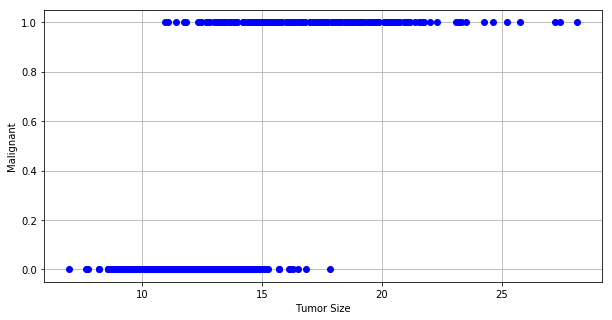

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(tumorSize, label, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant')
plt.grid(True)
plt.show()

### 0. Randomly Generated Data

In [122]:
X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)

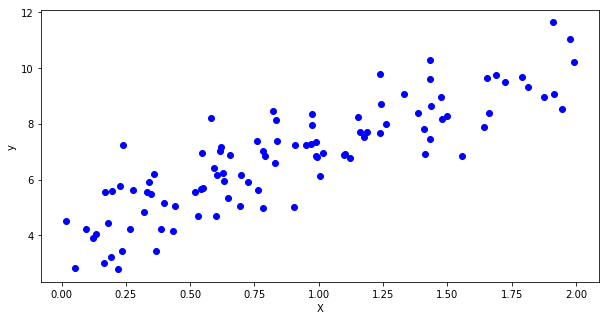

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 1. Using Normal Equation

Compute θ_hat using the Normal Equation.  
Use the *inv()* function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix  
*dot()* method for matrix multiplication

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.04517201],
       [3.08386373]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)

In [12]:
y_predict


array([[ 4.04517201],
       [10.21289946]])

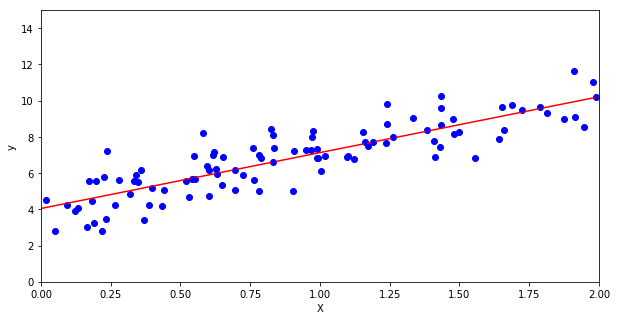

In [16]:
plt.figure(figsize=(10,5))
plt.plot(X, y, 'bo')
# plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 2. Using SKLearn

In [18]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.04517201] [[3.08386373]]


In [19]:
lin_reg.predict(X_new) 

array([[ 4.04517201],
       [10.21289946]])

### 3. Using Gradient Descent

#### 3.1 Batch Gradient Descent

In [20]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m=100 # Number of instances
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients
print(theta)

[[4.04517201]
 [3.08386373]]


### A1. Linear Algebra

In [3]:
from pprint import pprint
import numpy as np

In [8]:
# Matrix
m1 = np.array([[ 23 , 402], 
               [69 , 221], 
               [118, 0]])
pprint(m1)
print("m1.shape =", m1.shape )
v1 = np.array ([149, 92, 313])
pprint(v1)

array([[ 23, 402],
       [ 69, 221],
       [118,   0]])
m1.shape = (3, 2)
array([149,  92, 313])


In [11]:
# Matrix adding
m1 = np.array([[23,402],
               [69,221],
               [118,0]])
m2 = np.array([[93,21],
               [223,11],
               [123,6]])
pprint(m1)
pprint(m2)
pprint((m1+m2))

array([[ 23, 402],
       [ 69, 221],
       [118,   0]])
array([[ 93,  21],
       [223,  11],
       [123,   6]])
array([[116, 423],
       [292, 232],
       [241,   6]])


In [12]:
pprint(3*m1)

array([[  69, 1206],
       [ 207,  663],
       [ 354,    0]])


In [13]:
# Matrix multiplication
m1 = np.array([[1,3,2],
               [4,0,1]])
m2 = np.array([[1,3],
               [0,1],
               [5,2]])
assert(m1.shape[1] == m2.shape[0])
m3 = np.dot(m1,m2)

In [15]:
pprint(m1)
pprint(m2)
pprint(m3)

array([[1, 3, 2],
       [4, 0, 1]])
array([[1, 3],
       [0, 1],
       [5, 2]])
array([[11, 10],
       [ 9, 14]])


In [20]:
# Determinant
m1 = np.array([[23,42,79], 
               [69,6,21], 
               [8,0,9]])
print(np.linalg.det(m1))

-21576.000000000025


In [21]:
# Transpose
m1.T

array([[23, 69,  8],
       [42,  6,  0],
       [79, 21,  9]])

In [18]:
#Inverse
m1 = np.array([[0,5],
               [.5,0]])
inv_m1 = np.linalg.inv(m1)
pprint(inv_m1)
pprint(np.dot(m1, inv_m1))

array([[0. , 2. ],
       [0.2, 0. ]])
array([[1., 0.],
       [0., 1.]])


In [22]:
# Eigenvalues and eigenvectors
pprint(m1)
w,v = np.linalg.eig(m1)
print(w)
pprint(v)

array([[23, 42, 79],
       [69,  6, 21],
       [ 8,  0,  9]])
[ 75.6278032  -44.09739024   6.46958704]
array([[ 0.69512353,  0.60305364, -0.15461194],
       [ 0.7140288 , -0.79250916, -0.85857921],
       [ 0.08346348, -0.09086   ,  0.48881172]])
